## Machine Learning: KNN Churn Dataset

*Submitted by:*  
**Christian Elijah Darvin**  
BCS32  
College of Information Computer Studies - De La Salle University Dasmarinas

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.precision", 3)

In [43]:
df = pd.read_csv("./data/churn_dataset.csv")

## Explanatory Data Analysis

In [44]:
df.head()

,customerId,paymentMethod,monthly_minutes,age,tenure,label
0,1-136-08562-9,Mailed Check,22604.0,30,39,legit
1,0-384-11264-1,Mailed Check,17059.0,65,49,legit
2,0-08-151665-7,Credit Card,25848.0,55,14,legit
3,0-02-200816-0,Mailed Check,22080.0,58,38,legit
4,0-87476-135-2,Electronic Check,23871.0,23,32,legit


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
monthly_minutes,12196.0,19835.130,5081.962,584.0,16233.75,19659.0,23315.5,43799.0
age,12202.0,41.428,13.850,18.0,29.00,41.5,54.0,65.0
tenure,12202.0,30.887,17.426,1.0,16.00,31.0,46.0,60.0


In [24]:
df.isnull().sum()

customerId         3
paymentMethod      2
monthly_minutes    6
age                0
tenure             0
label              0
dtype: int64

In [25]:
df = df.dropna()

In [26]:
df["label"].value_counts()

label
legit    11493
fraud      698
Name: count, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12191 entries, 0 to 12201
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerId       12191 non-null  object 
 1   paymentMethod    12191 non-null  object 
 2   monthly_minutes  12191 non-null  float64
 3   age              12191 non-null  int64  
 4   tenure           12191 non-null  int64  
 5   label            12191 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 666.7+ KB


In [28]:
df["paymentMethod"].value_counts()

paymentMethod
Mailed Check        7455
Electronic Check    4313
Credit Card          351
Bank Transfer         72
Name: count, dtype: int64

In [29]:
# Convert paymentMethod column to strings
df["paymentMethod"] = df["paymentMethod"].astype(str)

# Remove the word (automatic)
# df["paymentMethod"] = df["paymentMethod"].apply(
#     lambda x: x.replace("(automatic)", "").strip()
# )
df["paymentMethod"] = df["paymentMethod"].apply(
    lambda x: (
        0
        if x.strip().lower() == "electronic check"
        else (
            1
            if x.strip().lower() == "mailed check"
            else 2 if x.strip().lower() == "bank transfer" else 3
        )
    )
)


df["paymentMethod"].value_counts()

paymentMethod
1    7455
0    4313
3     351
2      72
Name: count, dtype: int64

In [30]:
df["label"] = df["label"].apply(
    lambda x: 0 if x == "fraud" else 1 if x == "legit" else x
)

In [31]:
# Rename the columns based on the given instructions
df.columns = [
    "CustomerID",
    "PaymentMethod",
    "MonthlyMinutes",
    "Age",
    "Tenure",
    "Churn",
]
df.head()

,CustomerID,PaymentMethod,MonthlyMinutes,Age,Tenure,Churn
0,1-136-08562-9,1,22604.0,30,39,1
1,0-384-11264-1,1,17059.0,65,49,1
2,0-08-151665-7,3,25848.0,55,14,1
3,0-02-200816-0,1,22080.0,58,38,1
4,0-87476-135-2,0,23871.0,23,32,1


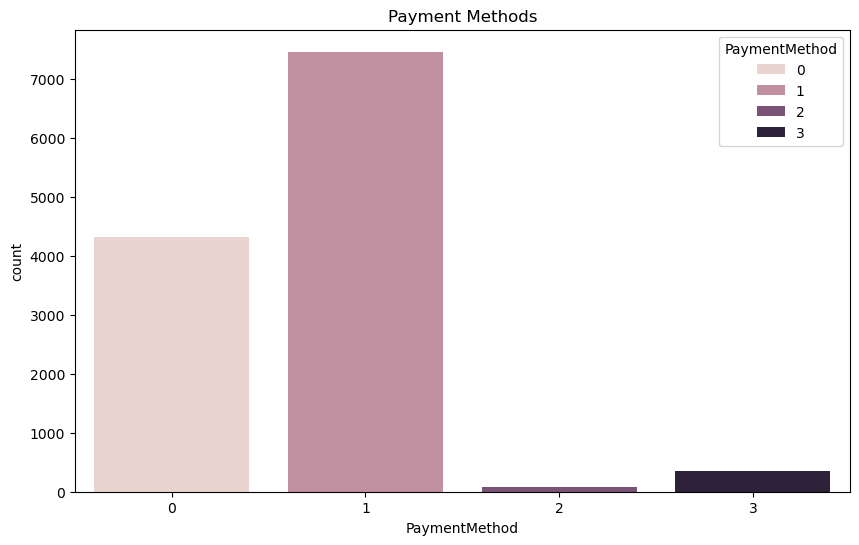

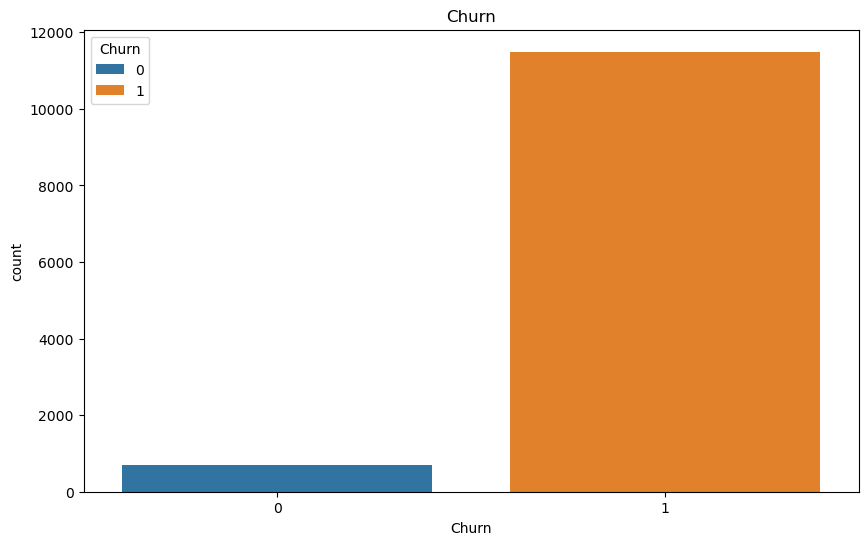

In [32]:
def create_countplot(data, x, hue, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=x, hue=hue)
    plt.title(title)
    plt.show()


create_countplot(df, "PaymentMethod", "PaymentMethod", "Payment Methods")
create_countplot(df, "Churn", "Churn", "Churn")

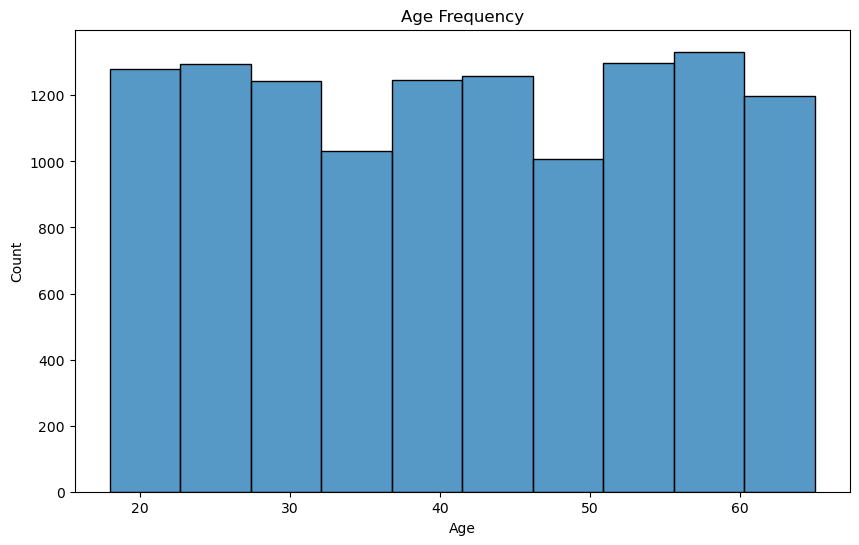

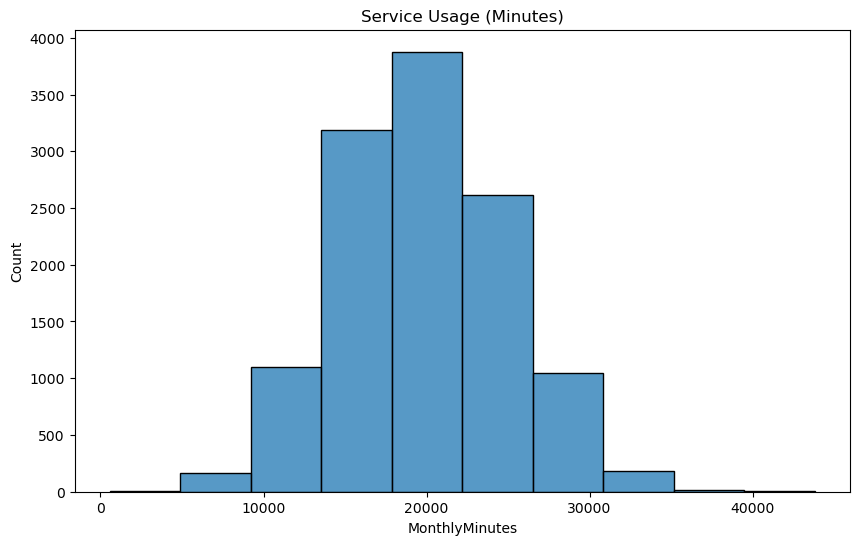

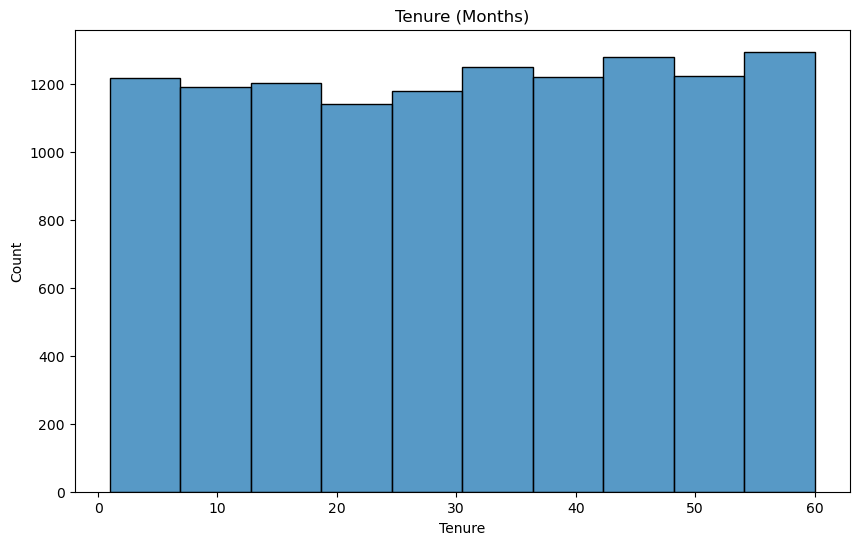

In [33]:
def create_histplot(data, x, title):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[x], bins=10)
    plt.title(title)
    plt.show()


create_histplot(df, "Age", "Age Frequency")
create_histplot(df, "MonthlyMinutes", "Service Usage (Minutes)")
create_histplot(df, "Tenure", "Tenure (Months)")

In [34]:
df.columns
# Not important: CUSID, PAYM,
# Check for age, montlymins, tenure

Index(['CustomerID', 'PaymentMethod', 'MonthlyMinutes', 'Age', 'Tenure',
       'Churn'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


X = df[
    [
        "MonthlyMinutes",
        "Tenure",
    ]
]
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(algorithm="brute", metric="euclidean", n_neighbors=9, p=1)
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.94024605 0.94024605 0.94024605 0.94079719 0.94021102]
Mean cross-validation score: 0.9403492686826398


In [37]:
from sklearn.metrics import accuracy_score

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy_score(y_pred, y_test)

0.9480590486604702

In [38]:
y_pred = knn.predict(X_test)

# Convert y_test to a NumPy array
y_test_array = y_test.to_numpy()  # or use y_test.values

# Concatenate the predicted values and the true values
result = np.concatenate(
    (y_pred.reshape(len(y_pred), 1), y_test_array.reshape(len(y_test_array), 1)), axis=1
)

print(result)

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 0]]


c:\Users\Chris\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Chris\AppData\Local\Temp\ipykernel_13792\2392791166.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


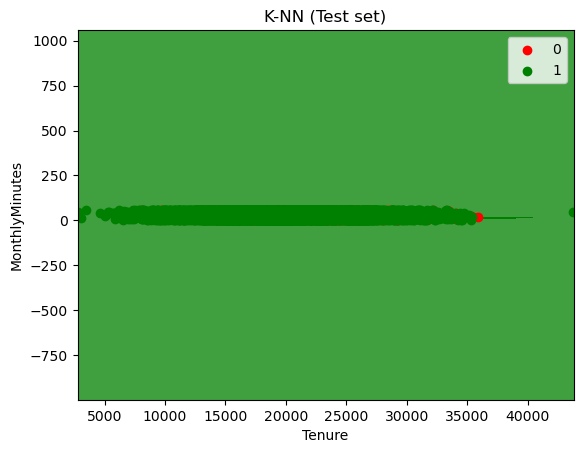

In [39]:
from matplotlib.colors import ListedColormap

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=1),
)
plt.contourf(
    X1,
    X2,
    knn.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("red", "green")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("red", "green"))(i),
        label=j,
    )
plt.title("K-NN (Test set)")
plt.xlabel("Tenure")
plt.ylabel("MonthlyMinutes")
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

print(f"Accuracy Score: {accuracy_score(y_pred, y_test):.3f}%")
print(f"Precision Score: {precision_score(y_pred, y_test):.3f}%")
print(f"Recall Score: {recall_score(y_pred, y_test):.3f}%")

Accuracy Score: 0.948%
Precision Score: 0.999%
Recall Score: 0.949%


[[   1  188]
 [   2 3467]]


<Axes: >

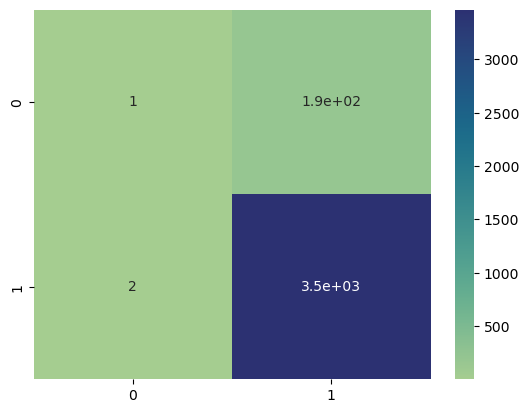

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, cmap="crest")